<h1 style="text-align:center; font-size: 55px;">Student Grade Prediction</h1>
<p style="text-align:center;"><img src="./Machine-Learning-Project-on-Student-Grades-Prediction.webp" width="500"></p>

## Understanding the Problem

In this project, we are working with the Students Grading Dataset from Kaggle. Our main goal is to predict students' final grades based on various factors such as attendance, participation, previous scores, and demographics.

This is a supervised learning classification problem because our target variable (final grade) falls into distinct categories rather than being a continuous numerical value. By building a machine learning model, we aim to identify patterns in the data that can help predict student performance accurately.

**Why is this important?**
- It can help teachers identify struggling students early.
- Schools can use it to improve their grading systems.
- Students can get insights into what factors impact their grades the most.

## Setting up the environment

Before we dive into analyzing our dataset, we need to set up our Python environment and install the necessary libraries. These libraries will help us load, clean, visualize, and train our model.

**Required Libraries:**

- pandas → Helps us load and manipulate the dataset.
- numpy → Useful for numerical calculations.
- matplotlib & seaborn → Used for visualizing data.
- scikit-learn → Contains tools for ML models, data splitting, and evaluation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Exploring the Dataset

Now that our environment is ready, let's load the data.

we need to read the dataset using Pandas' read_csv() to get data from csv file.

In [2]:
studentsData = pd.read_csv("Students_Grading_Dataset.csv")

In [3]:
studentsData.head()
# .head() helps us see the first five rows of the dataset so we can understand what kind of data we’re working with.

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [4]:
studentsData.info()
# .info() tells us about the number of columns, their data types, and if there are missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

**Missing Values**

- Attendance (%): 516 missing values
- Assignments_Avg: 517 missing values
- Parent_Education_Level: 1,794 missing values (a major issue!)

In [5]:
studentsData.describe()
#.describe() gives us important statistics (mean, min, max, etc.), helping us understand how the data is distributed.

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [6]:
print("Duplicate Rows:", studentsData.duplicated().sum())

Duplicate Rows: 0


No Duplicate Rows – No need to remove duplicates.

Unnecessary Columns – Student_ID, First_Name, Last_Name, and Email are not useful for predictions and can be dropped.

## Data Cleaning and handling inconsistencies

### Handling Gender incosistency

In [7]:
studentsData["First_Name"].unique()

array(['Omar', 'Maria', 'Ahmed', 'John', 'Liam', 'Sara', 'Emma', 'Ali'],
      dtype=object)

In [8]:
# unique gender values for each name
genderCheck = studentsData.groupby('First_Name')['Gender'].unique()
genderCheck

First_Name
Ahmed    [Male, Female]
Ali      [Male, Female]
Emma     [Male, Female]
John     [Female, Male]
Liam     [Male, Female]
Maria    [Male, Female]
Omar     [Female, Male]
Sara     [Female, Male]
Name: Gender, dtype: object

In [9]:
maleNames = {'Omar', 'Ahmed', 'John', 'Liam', 'Ali'}

In [10]:
# Assign gender based on our manually identified male names
studentsData['Gender'] = studentsData['First_Name'].apply(lambda name: 0 if name in maleNames else 1)

In [11]:
# unique gender values for each name
genderCheck = studentsData.groupby('First_Name')['Gender'].unique()
genderCheck

First_Name
Ahmed    [0]
Ali      [0]
Emma     [1]
John     [0]
Liam     [0]
Maria    [1]
Omar     [0]
Sara     [1]
Name: Gender, dtype: object

### Dropping Unnecessary columns

In [12]:
studentsData.drop(columns=["Student_ID", "First_Name", "Last_Name", "Email"], inplace=True)
studentsData.head()

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,1,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,0,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,0,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,0,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


### Handling missing Values

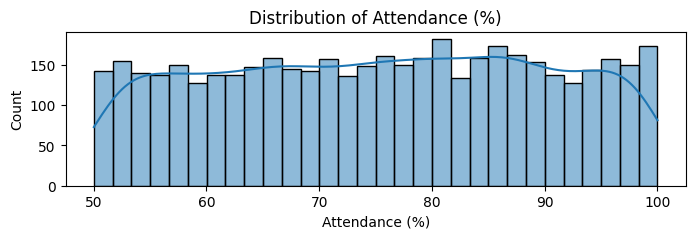

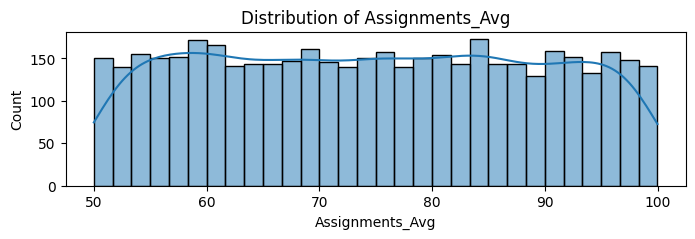

In [13]:
# Check distribution
plt.figure(figsize=(8, 2))
sns.histplot(studentsData['Attendance (%)'], bins=30, kde=True)
plt.title("Distribution of Attendance (%)")
plt.show()

plt.figure(figsize=(8, 2))
sns.histplot(studentsData['Assignments_Avg'], bins=30, kde=True)
plt.title("Distribution of Assignments_Avg")
plt.show()

In [14]:
# Fill missing values based on distribution analysis
studentsData['Attendance (%)'] = studentsData['Attendance (%)'].fillna(studentsData['Attendance (%)'].median())
studentsData['Assignments_Avg'] = studentsData['Assignments_Avg'].fillna(studentsData['Assignments_Avg'].median())

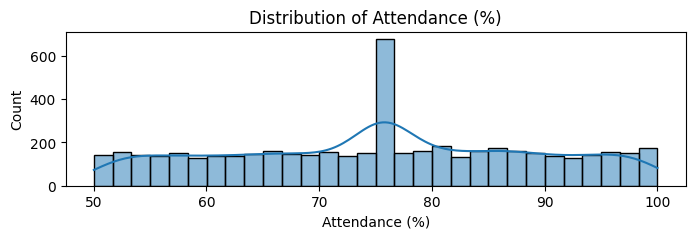

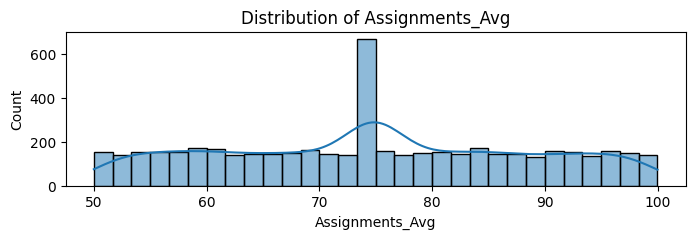

In [15]:
plt.figure(figsize=(8, 2))
sns.histplot(studentsData['Attendance (%)'], bins=30, kde=True)
plt.title("Distribution of Attendance (%)")
plt.show()

plt.figure(figsize=(8, 2))
sns.histplot(studentsData['Assignments_Avg'], bins=30, kde=True)
plt.title("Distribution of Assignments_Avg")
plt.show()

In [16]:
studentsData['Parent_Education_Level'].value_counts()

Parent_Education_Level
PhD            820
Bachelor's     810
High School    796
Master's       780
Name: count, dtype: int64

In [17]:
studentsData['Parent_Education_Level'] = studentsData['Parent_Education_Level'].fillna("Unknown",)

In [18]:
studentsData['Parent_Education_Level'].value_counts()

Parent_Education_Level
Unknown        1794
PhD             820
Bachelor's      810
High School     796
Master's        780
Name: count, dtype: int64

In [19]:
studentsData.isnull().sum()

Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

## Improving Grade System

In [20]:
studentsData.groupby("Grade")["Total_Score"].agg(["min", "max", "mean"])

,min,max,mean
Grade,,,
A,50.02,99.99,74.435592
B,50.05,99.99,75.017638
C,50.08,99.98,76.089899
D,50.03,99.94,75.535388
F,50.06,99.98,75.111635


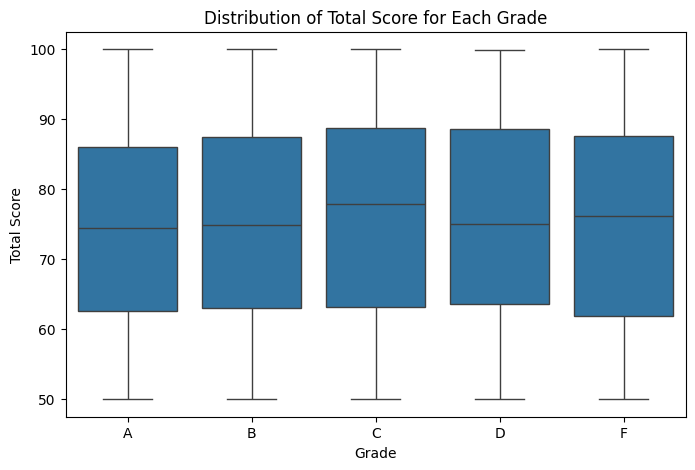

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=studentsData["Grade"], y=studentsData["Total_Score"], order=["A", "B", "C", "D", "F"])
plt.xlabel("Grade")
plt.ylabel("Total Score")
plt.title("Distribution of Total Score for Each Grade")
plt.show()

In [22]:
def assign_grade(score):
    if score >= 90:
        return 0
    elif score >= 80:
        return 1
    elif score >= 70:
        return 2
    elif score >= 60:
        return 3
    else:
        return 4

studentsData["Grade"] = studentsData["Total_Score"].apply(assign_grade)

# Check if the new grades make sense
studentsData.groupby("Grade")["Total_Score"].agg(["min", "max", "mean"])

,min,max,mean
Grade,,,
0,90.00,99.99,94.987206
1,80.02,89.99,85.033050
2,70.00,79.99,75.015399
3,60.00,69.99,65.020978
4,50.02,59.98,54.950305


In [23]:
studentsData.groupby("Grade")["Total_Score"].agg(["min", "max", "mean"])

,min,max,mean
Grade,,,
0,90.00,99.99,94.987206
1,80.02,89.99,85.033050
2,70.00,79.99,75.015399
3,60.00,69.99,65.020978
4,50.02,59.98,54.950305


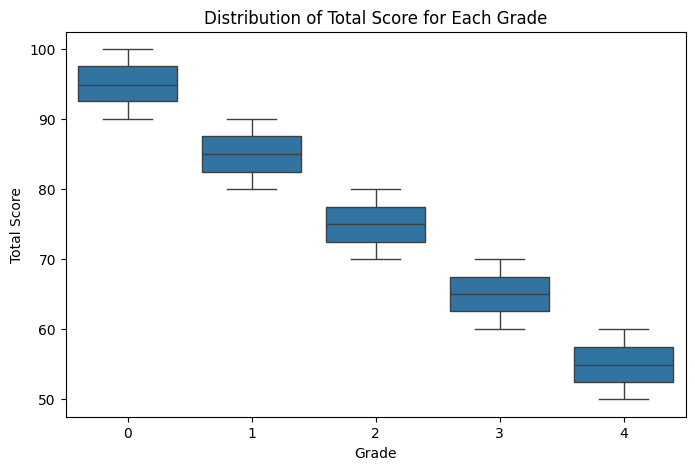

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=studentsData["Grade"], y=studentsData["Total_Score"], order=[0, 1, 2, 3, 4])
plt.xlabel("Grade")
plt.ylabel("Total Score")
plt.title("Distribution of Total Score for Each Grade")
plt.show()

## Feature Selection & Encoding

### Encoding

In [25]:
studentsData.head().T

,0,1,2,3,4
Gender,0,1,0,0,0
Age,22,18,24,24,23
Department,Engineering,Engineering,Business,Mathematics,CS
Attendance (%),52.29,97.27,57.19,95.15,54.18
Midterm_Score,55.03,97.23,67.05,47.79,46.59
Final_Score,57.82,45.8,93.68,80.63,78.89
Assignments_Avg,84.22,74.81,67.7,66.06,96.85
Quizzes_Avg,74.06,94.24,85.7,93.51,83.7
Participation_Score,3.99,8.32,5.05,6.54,5.97
Projects_Score,85.9,55.65,73.79,92.12,68.42


In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
# Separate categorical columns
categoricalCols = studentsData.select_dtypes(include=['object']).columns
categoricalCols = categoricalCols.drop('Grade', errors='ignore')

print("Categorical Columns:", categoricalCols)

Categorical Columns: Index(['Department', 'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level'],
      dtype='object')


In [28]:
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids dummy variable trap
encoded_data = encoder.fit_transform(studentsData[categoricalCols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categoricalCols))

studentsData.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

studentsData.drop(columns=categoricalCols, inplace=True)
studentsData = pd.concat([studentsData, encoded_df], axis=1)

In [29]:
studentsData.head().T

,0,1,2,3,4
Gender,0.00,1.00,0.00,0.00,0.00
Age,22.00,18.00,24.00,24.00,23.00
Attendance (%),52.29,97.27,57.19,95.15,54.18
Midterm_Score,55.03,97.23,67.05,47.79,46.59
Final_Score,57.82,45.80,93.68,80.63,78.89
Assignments_Avg,84.22,74.81,67.70,66.06,96.85
Quizzes_Avg,74.06,94.24,85.70,93.51,83.70
Participation_Score,3.99,8.32,5.05,6.54,5.97
Projects_Score,85.90,55.65,73.79,92.12,68.42
Total_Score,56.09,50.64,70.30,61.63,66.13


### Feature Scaling

In [30]:
# Check the range of numerical features
numericalCols = studentsData.select_dtypes(include=['number']).columns
numericalCols = numericalCols.drop('Grade')
studentsData[numericalCols].describe().T[['min', 'max']]

,min,max
Gender,0.00,1.00
Age,18.00,24.00
Attendance (%),50.01,100.00
Midterm_Score,40.00,99.98
Final_Score,40.00,99.98
Assignments_Avg,50.00,99.98
Quizzes_Avg,50.03,99.96
Participation_Score,0.00,10.00
Projects_Score,50.01,100.00
Total_Score,50.02,99.99


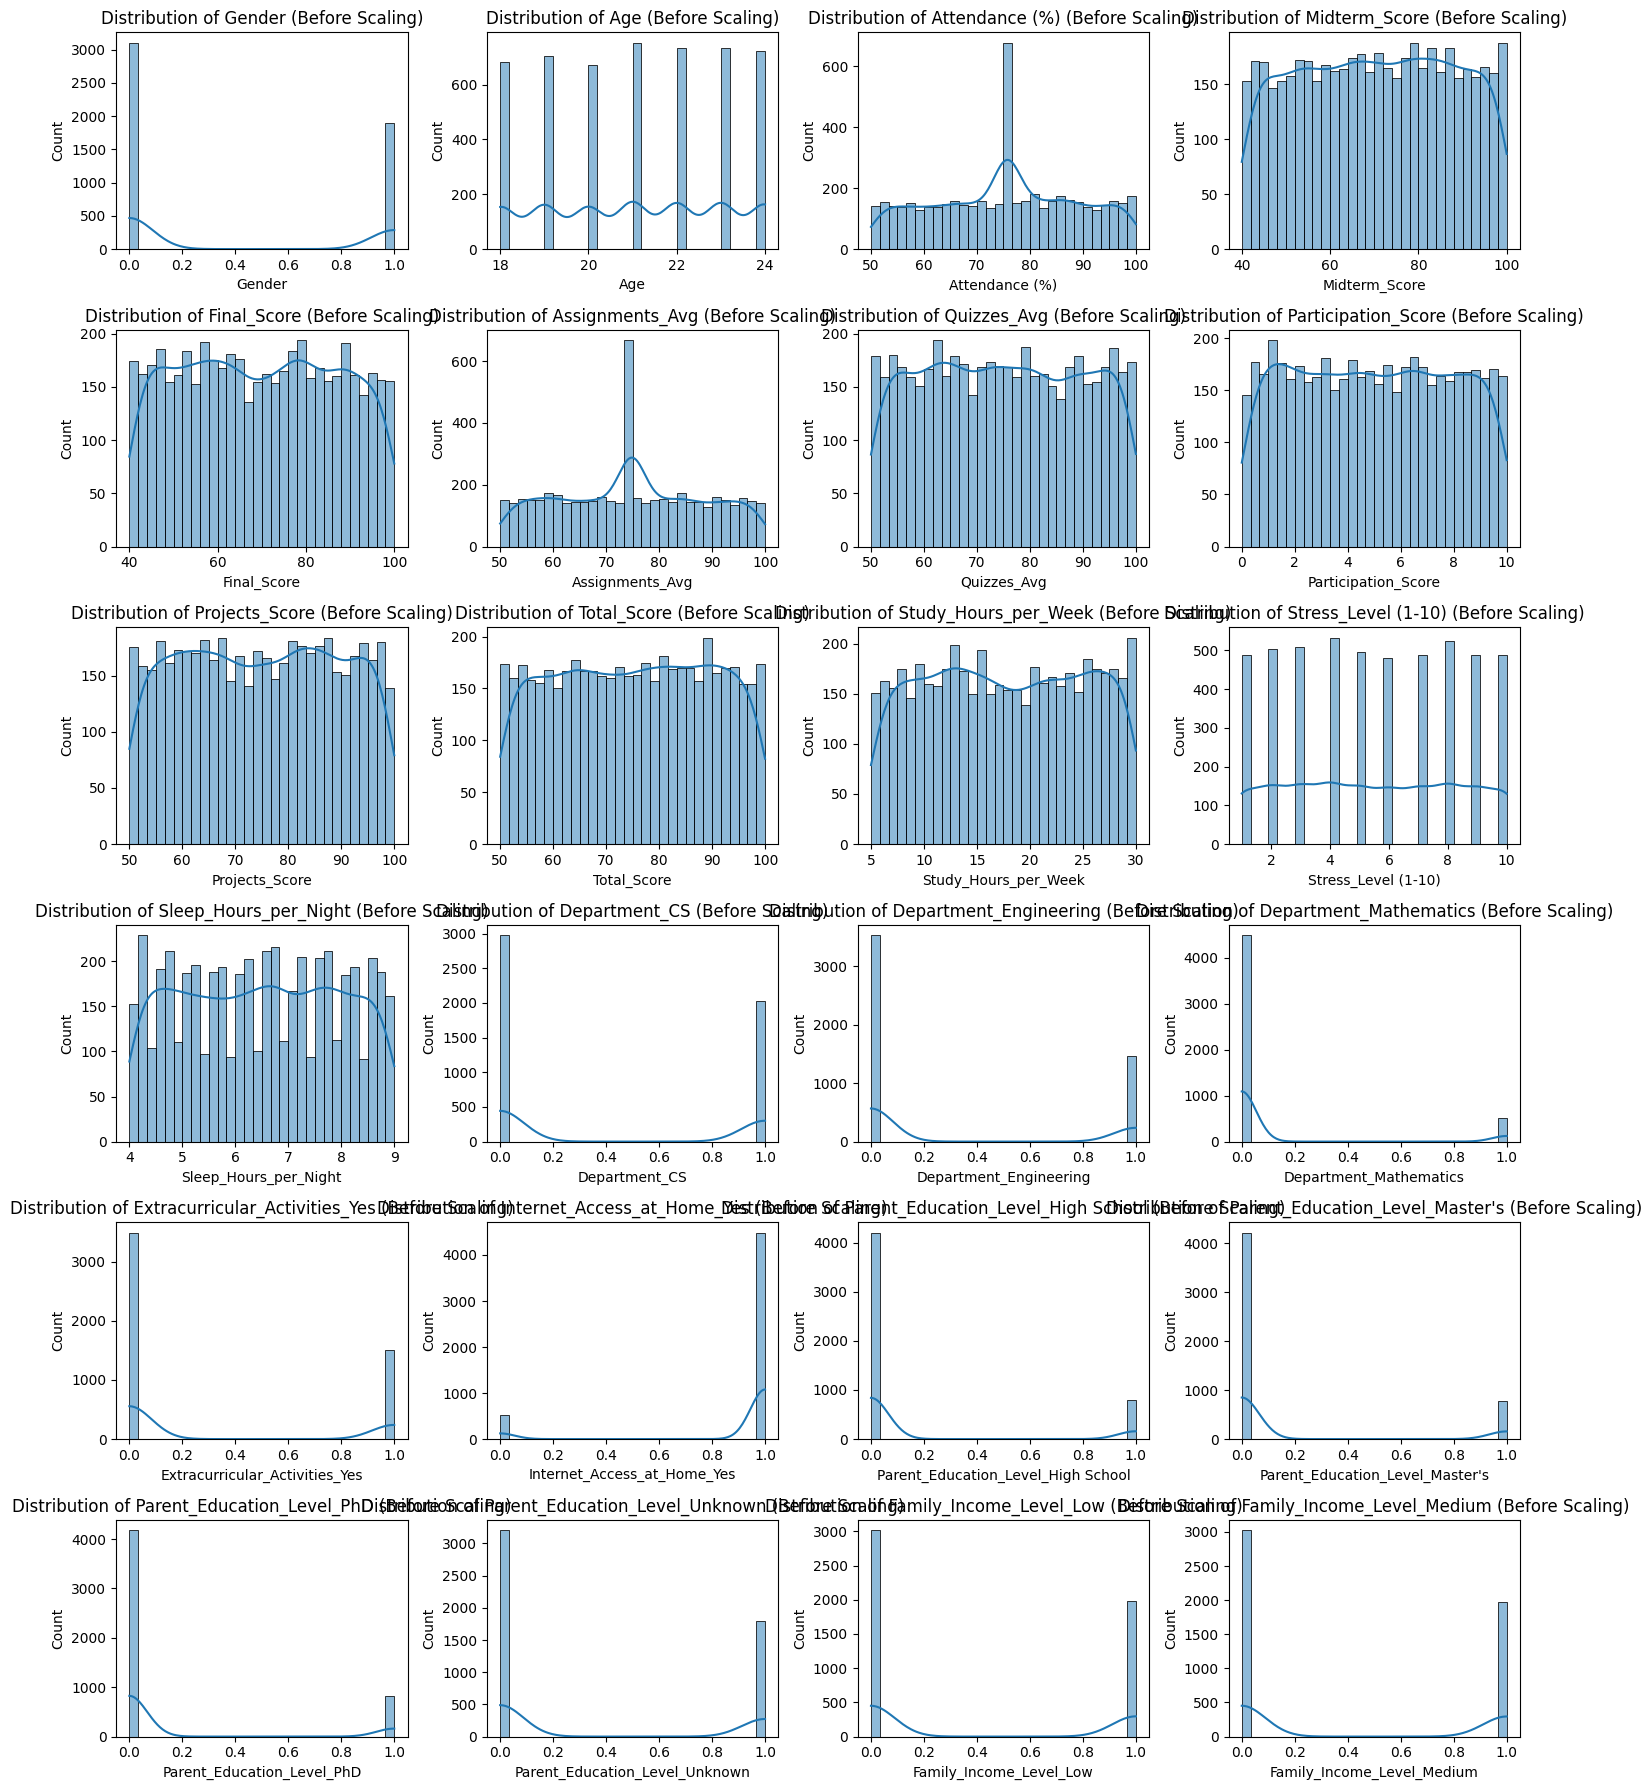

In [31]:
import math

num_features = len(numericalCols)
rows = math.ceil(num_features / 4)

plt.figure(figsize=(15, rows * 3))
for i, col in enumerate(numericalCols):
    plt.subplot(rows, 4, i+1)
    sns.histplot(studentsData[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (Before Scaling)")
plt.tight_layout()
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
studentsData[numericalCols] = scaler.fit_transform(studentsData[numericalCols])

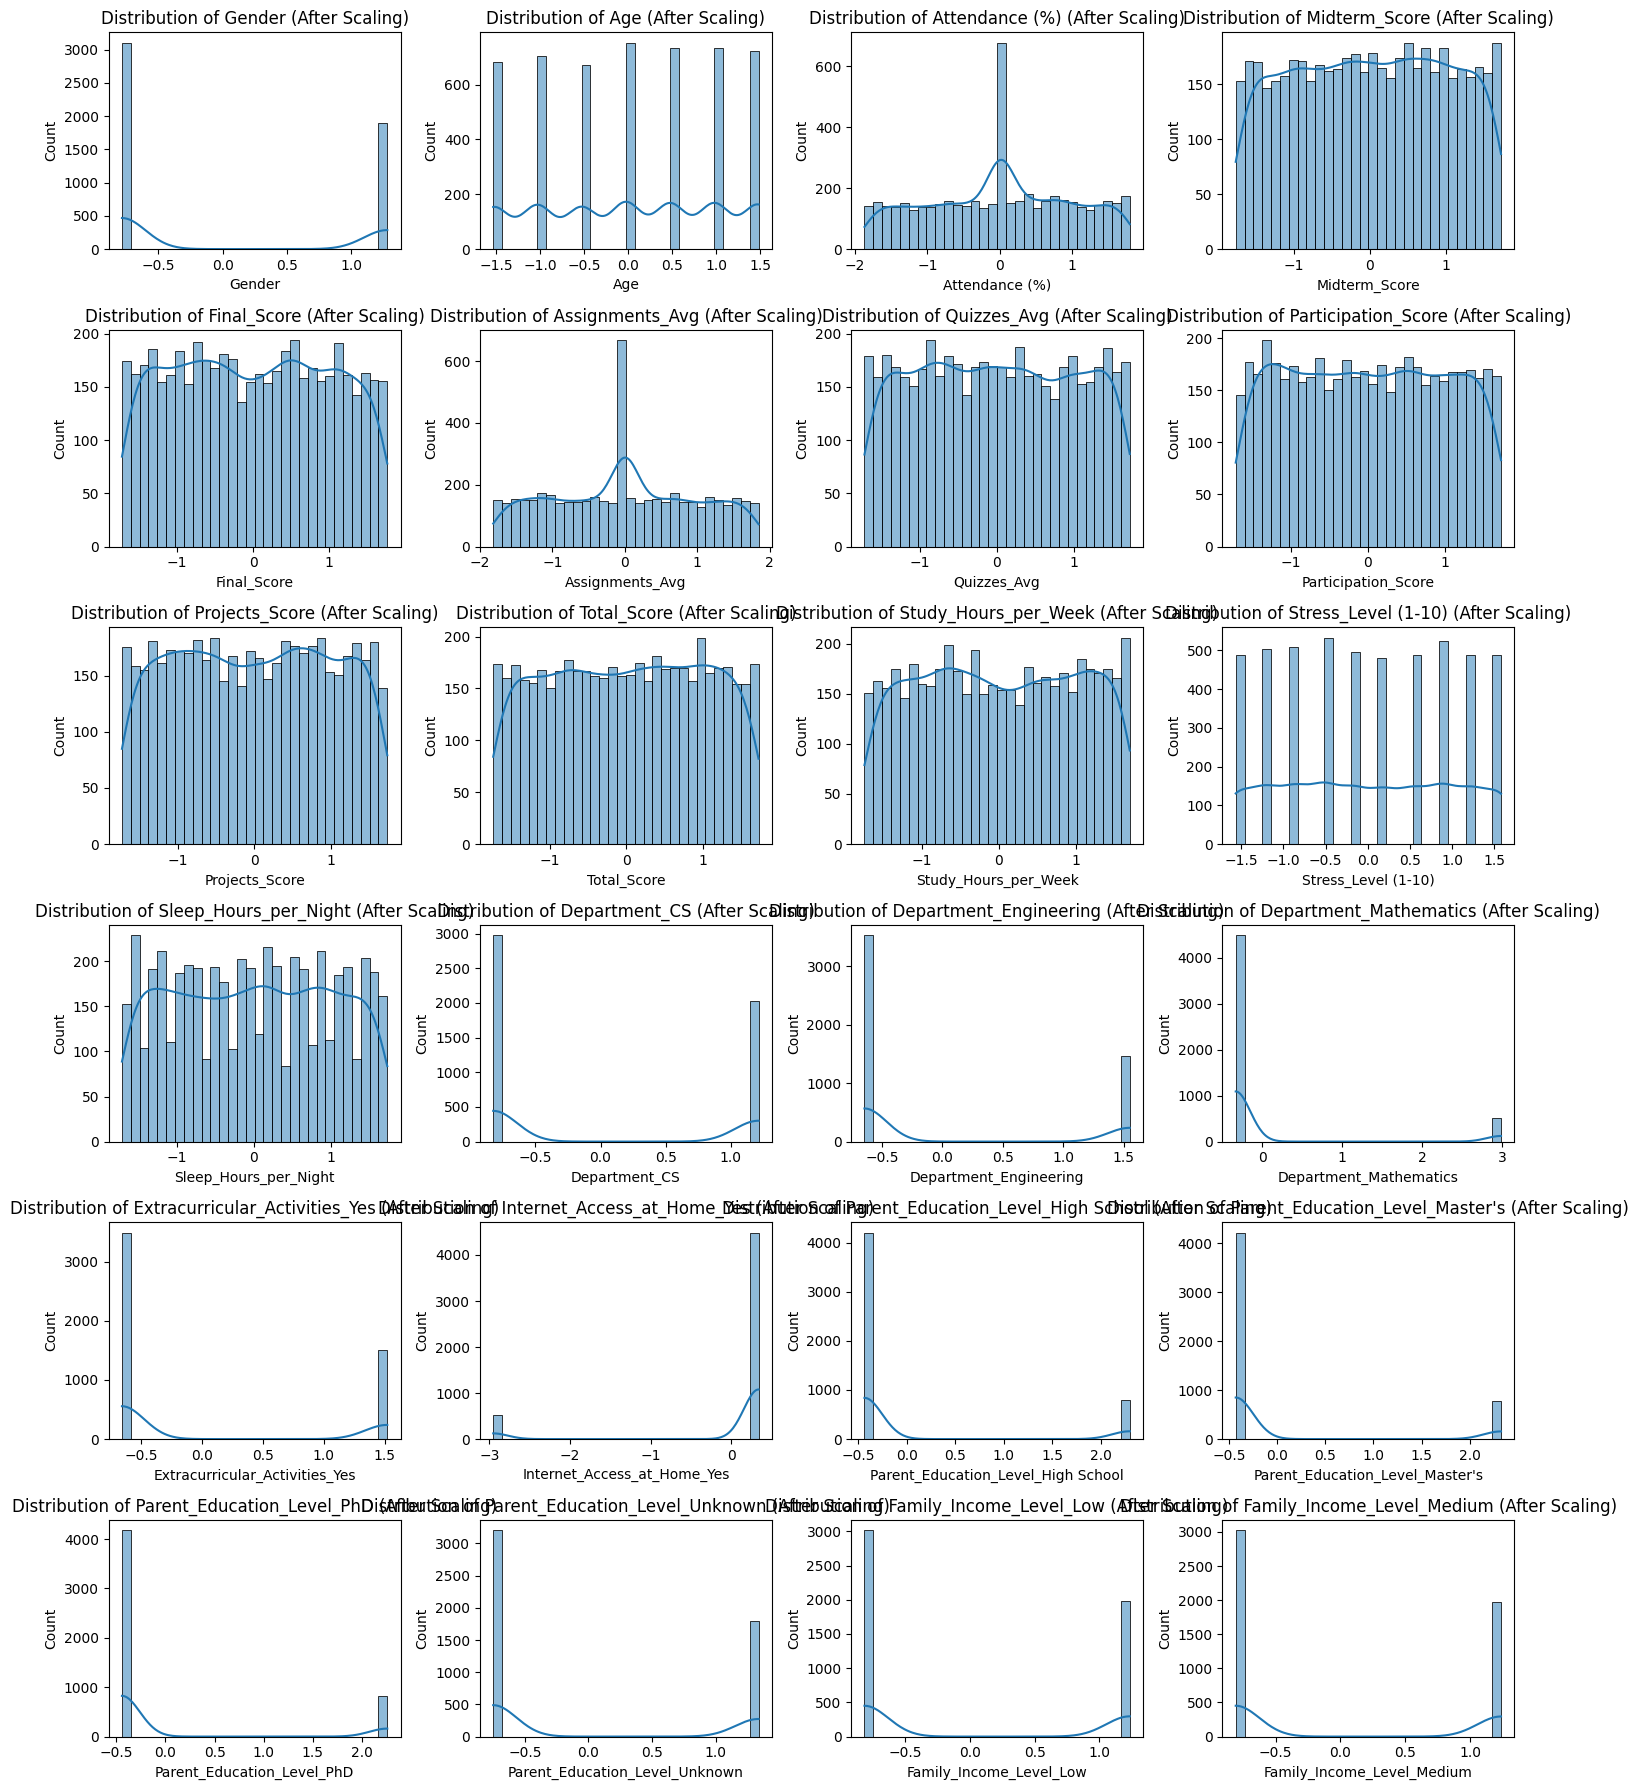

In [34]:
plt.figure(figsize=(15, rows * 3))  # Same dynamic adjustment
for i, col in enumerate(numericalCols):
    plt.subplot(rows, 4, i+1)
    sns.histplot(studentsData[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (After Scaling)")
plt.tight_layout()
plt.show()

In [35]:
studentsData[numericalCols].describe().T[['min', 'max']]

,min,max
Gender,-0.781885,1.278961
Age,-1.532177,1.483524
Attendance (%),-1.870155,1.803038
Midterm_Score,-1.762012,1.722870
Final_Score,-1.719600,1.760119
Assignments_Avg,-1.817523,1.845395
Quizzes_Avg,-1.715577,1.727199
Participation_Score,-1.723283,1.737108
Projects_Score,-1.727563,1.738676
Total_Score,-1.743362,1.727138


## Spliting Data

In [36]:
from sklearn.model_selection import train_test_split

X = studentsData.drop(columns=['Grade'])
y = studentsData['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (4000, 24)
Testing set size: (1000, 24)


### Creating a function to show scores of different model

In [37]:
def show_model_scores(y_test, y_pred):
    print("\nModel Evaluation Metrics\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

## Training Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
logReg = LogisticRegression(max_iter=500, random_state=42)
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [40]:
y_pred = logReg.predict(X_test)

In [41]:
show_model_scores(y_test, y_pred)


Model Evaluation Metrics

Accuracy: 0.9730

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       198
           1       0.96      0.97      0.96       209
           2       0.96      0.95      0.96       198
           3       0.95      0.99      0.97       198
           4       1.00      0.97      0.99       197

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

Confusion Matrix:
 [[194   4   0   0   0]
 [  1 203   5   0   0]
 [  0   5 188   5   0]
 [  0   0   2 196   0]
 [  0   0   0   5 192]]


- Accuracy: 97.3%
- Observations:
- Very high accuracy, showing that the dataset is well-separated for a linear model.
- Performs consistently across all classes, with f1-scores close to 0.97.
- Minor misclassifications in some categories, but overall a strong baseline model.

## Training Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred_rf = rf_model.predict(X_test)

In [45]:
show_model_scores(y_test, y_pred_rf)


Model Evaluation Metrics

Accuracy: 0.9990

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       198
           1       1.00      1.00      1.00       209
           2       1.00      1.00      1.00       198
           3       1.00      1.00      1.00       198
           4       1.00      1.00      1.00       197

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
 [[197   1   0   0   0]
 [  0 209   0   0   0]
 [  0   0 198   0   0]
 [  0   0   0 198   0]
 [  0   0   0   0 197]]


- Accuracy: 99.9% (Almost perfect!)
- Observations:
- Nearly perfect classification with minimal errors.
- The best-performing model so far, as it correctly identifies almost every instance.
- Works well for complex patterns in data, which aligns with its nature as an ensemble learning model.
- Potential drawback: Could be overfitting slightly since the accuracy is too high.

## Training XGBoost

In [46]:
!pip3 install xgboost


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [47]:
from xgboost import XGBClassifier

In [48]:
xgb = XGBClassifier(eval_metric="mlogloss", random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [49]:
y_pred_adjusted = xgb.predict(X_test)

In [50]:
show_model_scores(y_test, y_pred)


Model Evaluation Metrics

Accuracy: 0.9730

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       198
           1       0.96      0.97      0.96       209
           2       0.96      0.95      0.96       198
           3       0.95      0.99      0.97       198
           4       1.00      0.97      0.99       197

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

Confusion Matrix:
 [[194   4   0   0   0]
 [  1 203   5   0   0]
 [  0   5 188   5   0]
 [  0   0   2 196   0]
 [  0   0   0   5 192]]


- Accuracy: 97.3%
- Observations:
- Similar performance to Logistic Regression.
- Handles class imbalances well and provides high precision and recall for all classes.
- Could be a great choice if fine-tuned further, but Random Forest still outperforms it.

## Training SVM

In [51]:
from sklearn.svm import SVC

In [52]:
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [53]:
y_pred_svm = svm_model.predict(X_test)

In [54]:
show_model_scores(y_test, y_pred_svm)


Model Evaluation Metrics

Accuracy: 0.8780

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       198
           1       0.86      0.83      0.84       209
           2       0.84      0.84      0.84       198
           3       0.83      0.89      0.86       198
           4       0.96      0.89      0.92       197

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

Confusion Matrix:
 [[185  13   0   0   0]
 [ 17 173  19   0   0]
 [  0  16 167  15   0]
 [  0   0  13 177   8]
 [  0   0   0  21 176]]


- Accuracy: 87.8%
- Observations:
- Lower accuracy compared to other models (especially Random Forest & XGBoost).
- More misclassifications, particularly in class 1, 2, and 3.
- Works well but seems less suited for this dataset than tree-based models.
- Likely affected by the complexity of the decision boundaries in the data.

## Model Exploration Summary

- Best Model: Random Forest (99.9%) – Almost perfect classification.
- Weakest Model: SVM (87.8%) – Struggles to keep up with tree-based models.
- Alternative Models: XGBoost & Logistic Regression perform well (97.3%).

This suggests that Random Forest is an extremely strong model for this dataset. But it might be a case for overfitting.

## Checking for Overfitting on Random Forest

In [55]:
y_train_pred = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.9990


Random Forest model is likely overfitting because:

- Training Accuracy = 100% → The model perfectly memorized the training data.
- Test Accuracy = 99.9% → Extremely high, but still slightly lower than training accuracy.

we can try to reduce the overfitting using hyperparameter tunning.

## Using GridSearch for Hyperparameter Tunning on Random Forest

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [5, 10, 15],              # Tree depth
    'min_samples_split': [2, 5, 10],       # Minimum samples for a split
    'min_samples_leaf': [1, 5, 10]         # Minimum samples per leaf
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END max_depth=10, min_samples_le

In [66]:
best_rf_model = grid_search.best_estimator_

train_acc = best_rf_model.score(X_train, y_train)
test_acc = best_rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.9990


## Checking for Overfitting on Logistic Regression

In [70]:
train_acc = logReg.score(X_train, y_train)

test_acc = logReg.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.9828
Test Accuracy: 0.9730


- No major gap between training and test accuracy → This suggests minimal overfitting or good generalization.
- Test accuracy is still very high → The model is performing well on unseen data.
- Slightly higher training accuracy → Some overfitting might exist, but it’s not severe.

Logistic Regression is NOT overfitting significantly compared to Random Forest.But fine-tuning could still improve generalization.

## Using GridSearch for Hyperparameter Tunning on Logistic Regression

In [72]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers that support L1 and L2
}

logreg = LogisticRegression(max_iter=5000, random_state=42)

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [73]:
best_logreg = grid_search.best_estimator_

train_acc = best_logreg.score(X_train, y_train)
test_acc = best_logreg.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9965
Test Accuracy: 0.9960


logistic regression model, after fine-tuning with GridSearchCV, is performing very well.

Since the training and test accuracy are very close, overfitting is not a major concern. Overfitting happens when the model performs significantly better on training data than on test data, but here, both accuracies are nearly identical.

In [76]:
y_pred_final = best_logreg.predict(X_test)
show_model_scores(y_test, y_pred_final)


Model Evaluation Metrics

Accuracy: 0.9960

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       198
           1       0.99      1.00      0.99       209
           2       0.99      0.99      0.99       198
           3       1.00      1.00      1.00       198
           4       1.00      1.00      1.00       197

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
 [[196   2   0   0   0]
 [  0 208   1   0   0]
 [  0   1 197   0   0]
 [  0   0   0 198   0]
 [  0   0   0   0 197]]


## Conclusion

After testing and hyperparameter tuning, the Logistic Regression model with the following parameters is declared the best-performing model for our dataset:

**Best Hyperparameters**
- C = 0.1 (Regularization strength)
- Penalty = L1 (Lasso Regularization)
- Solver = SAGA (Optimized for L1 Regularization)
- Max Iterations = 5000
  
**Final Model Performance**
| Metric           | Training Data | Test Data |
|------------------|----------------|-----------|
| **Accuracy**     | 0.9965         | 0.9960    |

<br>Since the training and test accuracy are very close, the model does not suffer from overfitting and generalizes well.

## Model Evaluation Metrics

**Accuracy: 0.9960**

---

### **Classification Report:**

The classification report provides detailed performance metrics for each class, including precision, recall, and F1-score.

| **Grade** | **Precision** | **Recall** | **F1-Score** | **Support** |
|-----------|---------------|------------|--------------|-------------|
| 0         | 1.00          | 0.99       | 0.99         | 198         |
| 1         | 0.99          | 1.00       | 0.99         | 209         |
| 2         | 0.99          | 0.99       | 0.99         | 198         |
| 3         | 1.00          | 1.00       | 1.00         | 198         |
| 4         | 1.00          | 1.00       | 1.00         | 197         |

**Accuracy**: 1.00  
**Macro avg**: 1.00 | 1.00 | 1.00  
**Weighted avg**: 1.00 | 1.00 | 1.00  

---

### **Confusion Matrix:**

The confusion matrix shows how well the model predicts each class, highlighting correct predictions and misclassifications.

|            | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 | Predicted 4 |
|------------|-------------|-------------|-------------|-------------|-------------|
| **Actual 0** | 196         | 2           | 0           | 0           | 0           |
| **Actual 1** | 0           | 208         | 1           | 0           | 0           |
| **Actual 2** | 0           | 1           | 197         | 0           | 0           |
| **Actual 3** | 0           | 0           | 0           | 198         | 0           |
| **Actual 4** | 0           | 0           | 0           | 0           | 197         |

---

### **Summary:**

The model demonstrates excellent performance with high precision, recall, and F1-score across all classes, resulting in a near-perfect accuracy of **99.60%**. The confusion matrix further supports this, showing minimal errors in predictions. The misclassifications are minimal, with only a few instances predicted as another class.


# **Author: Rohan Das**

**Junior Engineer at CloudxLab | Alumni of Vivekananda Global University**

<img src="https://ugc.production.linktr.ee/f9907aa7-25b0-4295-87cb-e88460e512ce_myimage1.png?io=true&size=avatar-v3_0" width="200" height="200" alt="Rohan Das">

*Jaipur, Rajasthan, India*  
📧 Email: [rd555217@gmail.com](mailto:rd555217@gmail.com)  
💻 GitHub: [ROHANDAS2003](https://github.com/ROHANDAS2003)  
🌐 Portfolio: [rohandas2003.com](https://www.rohandas2003.com/)<br>
🌳 Linktree: [mr_RohanDas](https://linktr.ee/mr_RohanDas)

---

## **About Me**

Hello! I'm **Rohan Das**, a passionate AI & ML enthusiast, Python developer, and full-stack web developer. With a strong foundation in computer applications and hands-on experience in various technologies, I am committed to continuous learning and innovation.

---

## **Skills**

- **Programming Languages:** ML Basics, Python, SQL, Full-stack web development  
- **Frameworks & Libraries:** Django, Numpy, Pandas, Matplotlib  
- **Tools & Platforms:** Linux, Git, GitHub  

---

## **Projects**

- **Django-based Wordle Game:**  
  Developed a web-based Wordle game using Django, enhancing user engagement through interactive gameplay.

- **voguehandicrafts.in:**  
  Collaborated on creating an e-commerce platform for a handicrafts business, featuring user-friendly interfaces.

- **Expense Tracker:**  
  Built a Python application to help users manage and track their expenses efficiently.

For more projects, visit my GitHub profile: [ROHANDAS2003](https://github.com/ROHANDAS2003)

---

## **Blogs**

I regularly write about technology and programming. Check out my latest posts:

- [Semantic Product Search Using Embeddings](https://medium.com/@rohan-das/semantic-product-search-using-embeddings-5531db6e27fa)
- [Understanding Embeddings: Simple Explanation & Hands-on](https://rohan-das.medium.com/understanding-embeddings-simple-explanation-hands-on-1234567890ab)  
- [Cosine Similarity: A Geometric Perspective](https://rohan-das.medium.com/cosine-similarity-a-geometric-perspective-0987654321cd)  

Read more on my Medium blog: [Rohan Das – Medium](https://rohan-das.medium.com/)

---

## **Let's Connect**

I'm always open to new opportunities and collaborations. Feel free to reach out to me via email or connect with me on LinkedIn.

[![LinkedIn](https://img.shields.io/badge/LinkedIn-RohanDas-blue)](https://www.linkedin.com/in/mr-rohandas/)

---

*Last updated: March 15, 2025*
